# Ejercicio 1
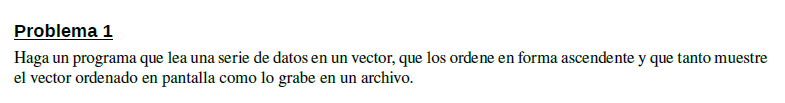

In [2]:
import numpy as np

In [3]:
dim = 5
v = np.random.rand(dim)*100

In [4]:
V= np.sort(v)

In [5]:
print(v)

[43.57032429 58.69524296 83.41530327 50.09513367 78.66367091]


In [6]:
np.save('test.npy',V)

# Ejercicio 2
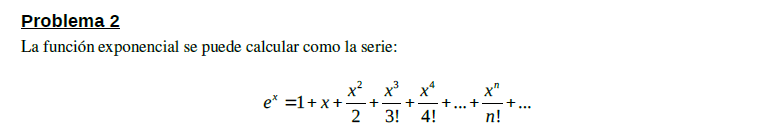

In [2]:
import math

x = 0.5
it1 = 1
it2 = x + 1
error = it2-it1
n_it = 1

while abs(error) > 1e-3 and n_it < 100:
    it1 = it2
    it2 = it2 + x**(n_it+1)/math.factorial(n_it+1)
    error = it2-it1
    #print(error)
    n_it+= 1

print("El valor de e**0,5 es %8.7f, obtenido en %3d iteraciones con un error de %6.5f" % (it2, n_it, error))

El valor de e**0,5 es 1.6486979, obtenido en   5 iteraciones con un error de 0.00026


# Ejercicio 3
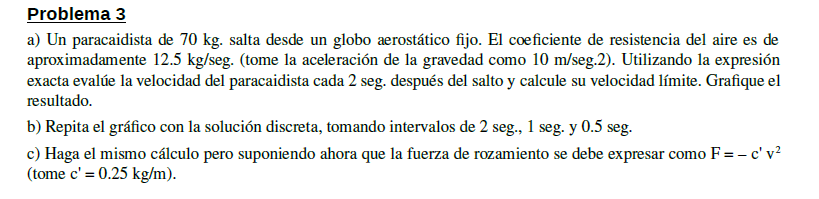

In [ ]:
import numpy as np


# Ejercicio 4
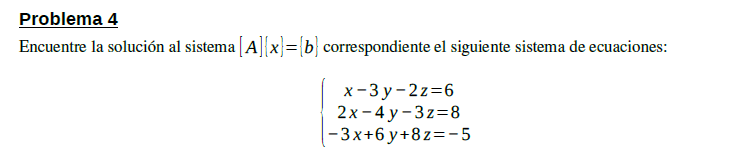

In [16]:
import numpy as np
A = np.array([[1,-3,-2],[2,-4,-3],[-3,6,8]])
b = np.array([6,8,-5])
v_sol = np.linalg.solve(A,b)
print(v_sol)
np.allclose(np.dot(A,v_sol),b)


[ 1. -3.  2.]


True

# Ejercicio 5
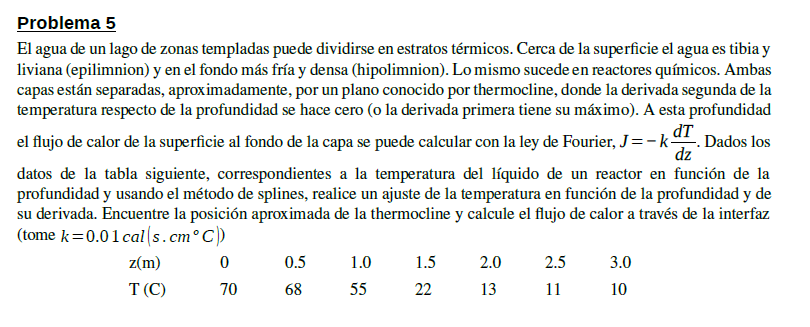

1.2000000000000002


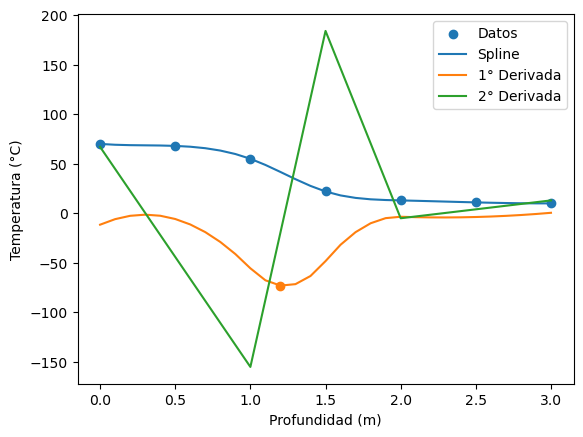

In [100]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#z = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0])
z = np.linspace(0,3,7)
T = np.array([70,68,55,22,13,11,10])

cs = CubicSpline(z,T)
xs = np.arange(0,3.1,0.1)
#plt.plot(z,T)
#plt.xlabel('Profundidad (m)')
#plt.ylabel('Temperatura (°C)')
#plt.show

t_deriv = cs(xs,1)
idx_0 = np.argmin(t_deriv)
print(xs[idx_0])

k = 0.01
J = -k*t_deriv

#idx_0 = np.argmin(t_deriv2[10:15])+10
#print(t_deriv2)
#print(t_deriv2[idx_0])

fig, ax = plt.subplots()
ax.scatter(z,T, label = 'Datos')
ax.plot(xs,cs(xs), label = 'Spline')
ax.scatter(xs[idx_0],cs(xs[idx_0],1))
ax.plot(xs,cs(xs,1), label = '1° Derivada')
ax.plot(xs,cs(xs,2), label = '2° Derivada')
ax.set_xlabel('Profundidad (m)')
ax.set_ylabel('Temperatura (°C)')
ax.legend()



# Ejercicio 6

1.3793355208070832
10.725263727915005


<ErrorbarContainer object of 3 artists>

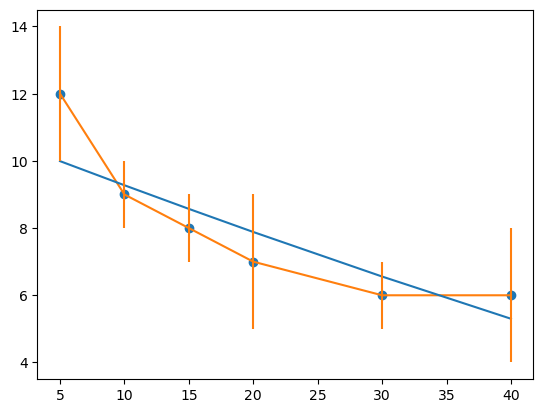

In [33]:
import numpy as np
import matplotlib.pyplot as plt

P = [5,10,15,20,30,40]
E = [12,9,8,7,6,6]
E_err = [2,1,1,2,1,2]

ln_E = np.log(E)
x = [np.log(1-i/100) for i in P]

m, ln_E0 = np.polyfit(x,ln_E,1)
print(m)
print(np.exp(ln_E0))

def lineal_eq(x,m,b):
    return m*x+b
y = [lineal_eq(i,m,ln_E0) for i in x]
fig, ax = plt.subplots()
#ax.scatter(x,ln_E, label = 'Datos')
#ax.plot(x,y, label = 'Spline')
ax.scatter(P,E)
ax.plot(P,np.exp(y))
ax.errorbar(P,E,E_err,)

# Ejercicio 7
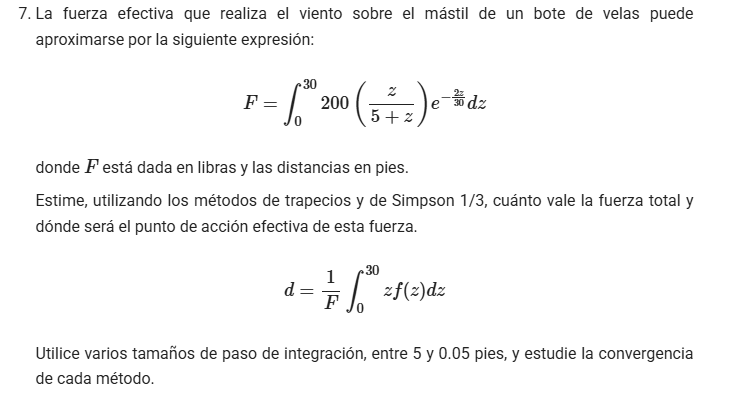

# Ejercicio 8
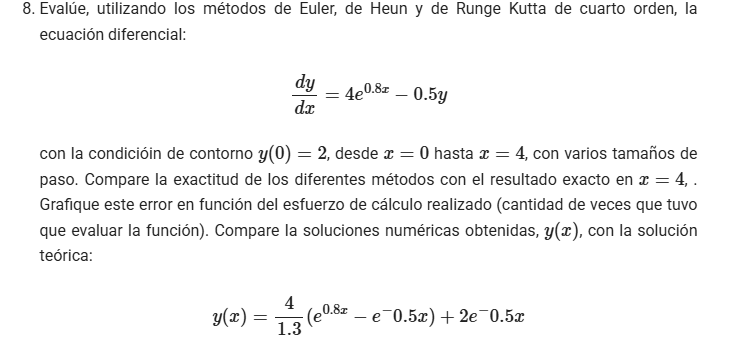

In [45]:
def ec_dif(x,y):
    return 4*np.exp(0.8*x)-0.5*y

def fun_real(x):
    return (4/1.3)*(np.exp(0.8*x)-np.exp(-0.5*x))+2*np.exp(-0.5*x)

print(fun_real(4))

#params = [x_i, y_i]
def euler(params,fxy, h):
    return params[1] + h*fxy(params[0], params[1])


75.33896260915857


Constantes del problema

In [133]:
x = [0]
y = [2]
x_final = 4
paso = 0.5
N = int(x_final//paso)

Euler

In [55]:
x = [0]
y = [2]
x_final = 4
paso = 0.001
N = int(x_final//paso)

#params = [x_i, y_i]
def euler(params,fxy, h):
    return params[1] + h*fxy(params[0], params[1])

for i in range(N):
    y_nuevo = euler([x[-1],y[-1]],ec_dif,paso)
    y.append(y_nuevo)
    x.append(paso+paso*i)

print(y[-1])

74.94559673356792


Heun

In [112]:
x = [0]
y = [2]
x_final = 4
paso = 0.001
N = int(x_final//paso)

#params[0,1] = [x_i, y_i]
def heun(params, fxy, euler, h):
    euler_estim = euler(params,fxy,h)
    return params[1]+(h/2)*(fxy(params[0],params[1]) + fxy(params[0],euler_estim))

for i in range(N):
    y_nuevo = heun([x[-1],y[-1]],ec_dif,euler,paso)
    y.append(y_nuevo)
    x.append(paso+paso*i)

print(y[-1])

75.29373061408982


Runge Kuta de orden 4

In [160]:
x = [0]
y = [2]
x_final = 4
paso = 0.001
N = int(x_final//paso)

def ruku4(params, fxy, h):
    x_actual = params[0]
    y_actual = params[1]
    k1 = fxy(x_actual, y_actual)
    k2 = fxy(x_actual + h/2, y_actual + (h/2)*k1)
    k3 = fxy(x_actual + h/2, y_actual + (h/2)*k2)
    k4 = fxy(x_actual + h, y_actual + h*k3)
    pendiente_prom = (k1 + 2*k2 + 2*k3 + k4)/6
    y_nuevo = y_actual + pendiente_prom*h
    return y_nuevo

for i in range(N):
    y_nuevo = ruku4([x[-1],y[-1]],ec_dif,paso)
    y.append(y_nuevo)
    x.append(paso+paso*i)

print(y[-1])

75.27852610012015


Comparación entre los distintos métodos

In [162]:
pasos = [0.1, 0.01, 0.001, 0.0001]
y_euler = []
y_heun = []
y_ruku4 = []
for p in pasos:
    x_final = 4
    N = int(x_final//p)
    for i in range(3):
        x = [0]
        y = [2]
        if i == 0:
            for j in range(N):
                y_nuevo = euler([x[-1],y[-1]],ec_dif,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_euler.append(y[-1])
        elif i == 1:
            for j in range(N):
                y_nuevo = heun([x[-1],y[-1]],ec_dif,euler,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_heun.append(y[-1])
        else:
            for j in range(N):
                y_nuevo = ruku4([x[-1],y[-1]],ec_dif,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_ruku4.append(y[-1])
print(y_euler)
print(y_heun)
print(y_ruku4)


[67.82730465757413, 74.55415439877088, 75.26013512876612, 75.33107638406973]
[66.75517042801208, 74.43886235468274, 75.24852257784282, 75.32991429291071]
[69.52795923770788, 74.73676347262436, 75.27852610012015, 75.33291678657254]


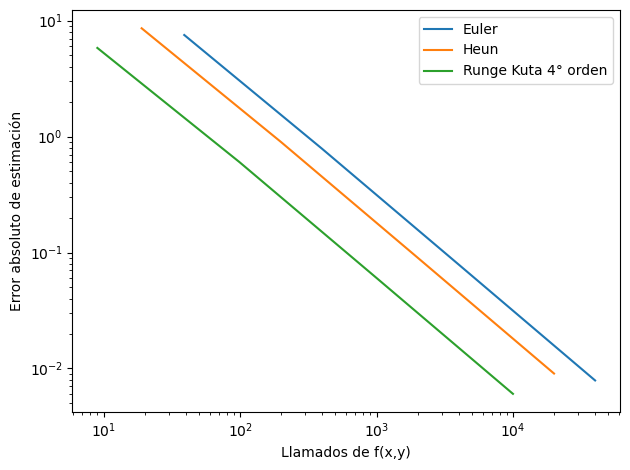

In [155]:
import matplotlib.pyplot as plt
y_real = fun_real(4)
dif_euler = abs(y_real - y_euler)
dif_heun = abs(y_real - y_heun)
dif_ruku4 = abs(y_real - y_ruku4)

#plotteo el error de cada método (diferencia entre valor real y estimado) en función de cuántas veces llamo a la función
#cada vez que llamo a heun la llamo dos veces, cada que llamo a ruku4 lo hago 4 veces
fig,ax = plt.subplots()
ax.plot(x_final//np.array(pasos), dif_euler, label = 'Euler')
ax.plot(x_final//(2*np.array(pasos)), dif_heun, label = 'Heun')
ax.plot(x_final//(4*np.array(pasos)), dif_ruku4, label = 'Runge Kuta 4° orden')
ax.set_xlabel('Llamados de f(x,y)')
ax.set_ylabel('Error absoluto de estimación')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()
plt.show()